**Задание** \
Цель: изучить применение дерева решений в рамках задачи регрессии\
Описание задания:\
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

In [ ]:
import pandas as pd
import numpy as np
import math

import seaborn as sns 
from matplotlib import pyplot as plt

from sklearn import datasets
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).**

In [ ]:
from sklearn.datasets import fetch_california_housing
type(fetch_california_housing)

function

In [ ]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
housing = fetch_california_housing()
type(housing)

sklearn.utils._bunch.Bunch

In [ ]:
housing_df = pd.DataFrame(data=housing.data, 
                  columns=housing.feature_names)
housing_df['target'] = housing.target

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**2. Проведите первичный анализ.\
a.Проверьте данные на пропуски. Удалите в случае обнаружения.\
b.Нормализуйте один из признаков.**

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Пропусков нет

In [ ]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Нормализуем признак HouseAge

In [ ]:
housing_df['HouseAge'] = (housing_df['HouseAge'] - 
                          housing_df['HouseAge'].min()) / (housing_df['HouseAge'].max() - 
                                                           housing_df['HouseAge'].min())    
  
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,0.784314,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,0.392157,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,1.000000,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,1.000000,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,1.000000,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Удалим коллинеарный признак AveBedrms и выбросы

In [ ]:
housing_df = housing_df.drop(columns = ['AveBedrms'])

In [ ]:
upper_lim = housing_df['Population'].quantile(.95) 
lower_lim = housing_df['Population'].quantile(.05) 
housing_df.loc[(housing_df['Population'] > upper_lim),'Population'] = upper_lim 
housing_df.loc[(housing_df['Population'] < lower_lim),'Population'] = lower_lim

In [ ]:
upper_lim = housing_df['AveRooms'].quantile(.95) 
housing_df.loc[(housing_df['AveRooms'] > upper_lim),'AveRooms'] = upper_lim

housing_df = housing_df[housing_df['AveRooms'] >= 1]

In [ ]:
upper_lim = housing_df['AveOccup'].quantile(.95) 
lower_lim = housing_df['AveOccup'].quantile(.05) 
housing_df.loc[(housing_df['AveOccup'] > upper_lim),'AveOccup'] = upper_lim 
housing_df.loc[(housing_df['AveOccup'] < lower_lim),'AveOccup'] = lower_lim

In [ ]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
count,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000
mean,3.870684,0.541930,5.275855,1353.032852,2.900303,35.632016,-119.569825,2.068625
std,1.899894,0.246776,1.183769,775.060282,0.651960,2.135997,2.003591,1.153989
min,0.499900,0.000000,1.000000,348.000000,1.873001,32.540000,-124.350000,0.149990
25%,2.562800,0.333333,4.440930,787.000000,2.429828,33.930000,-121.800000,1.196000
50%,3.534800,0.549020,5.229190,1166.000000,2.818295,34.260000,-118.490000,1.797000
75%,4.743550,0.705882,6.052381,1725.000000,3.282267,37.710000,-118.010000,2.647750
max,15.000100,1.000000,7.640247,3288.000000,4.333583,41.950000,-114.310000,5.000010


**3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**

**4. Обучите модель регрессии на обучающем множестве.**

**5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.**

In [ ]:
X = housing_df.loc[ : , housing_df.columns != 'target']
X.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,0.784314,6.984127,348.0,2.555556,37.88,-122.23
1,8.3014,0.392157,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,1.000000,7.640247,496.0,2.802260,37.85,-122.24
3,5.6431,1.000000,5.817352,558.0,2.547945,37.85,-122.25
4,3.8462,1.000000,6.281853,565.0,2.181467,37.85,-122.25


In [ ]:
y = housing_df['target']
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
model = LinearRegression()
model.fit(X_train, y_train)
    
y_pred = model.predict(X_test)

In [ ]:
score_LR = model.score(X_test, y_test)
score_LR

0.6494019765212473

**6. Обучите дерево решений на обучающем множестве.\
a. Повторите п. 5 для полученной модели.\
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.**

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 7
rcParams['font.size'] = 14

Попробуем оценить важность фичей. Для этого нам надо преобразовать целевую переменную в дискретную. Сначала разобъём на категории, а потом воспользуемся LabelEncoder, в нашем случае он может подойти, потому что чем выше цена, тем выше категория.

In [ ]:
housing_df['target'].value_counts()

5.00001    965
1.37500    122
1.62500    116
1.12500    102
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: target, Length: 3842, dtype: int64

In [ ]:
housing_df['label_target'] = pd.cut(x = housing_df['target'], bins=[0.0, 1.5, 3.0, 4.0, 6.0],
                             labels=[1, 2, 3, 4])

In [ ]:
housing_df['label_target'].value_counts()

2    9183
1    7619
3    2092
4    1744
Name: label_target, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(housing_df['label_target'])

LabelEncoder()

In [ ]:
le.classes_

array([1, 2, 3, 4])

In [ ]:
y_label = pd.Series (data = le.transform(housing_df['label_target']))
y_label.head()

0    3
1    2
2    2
3    2
4    2
dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

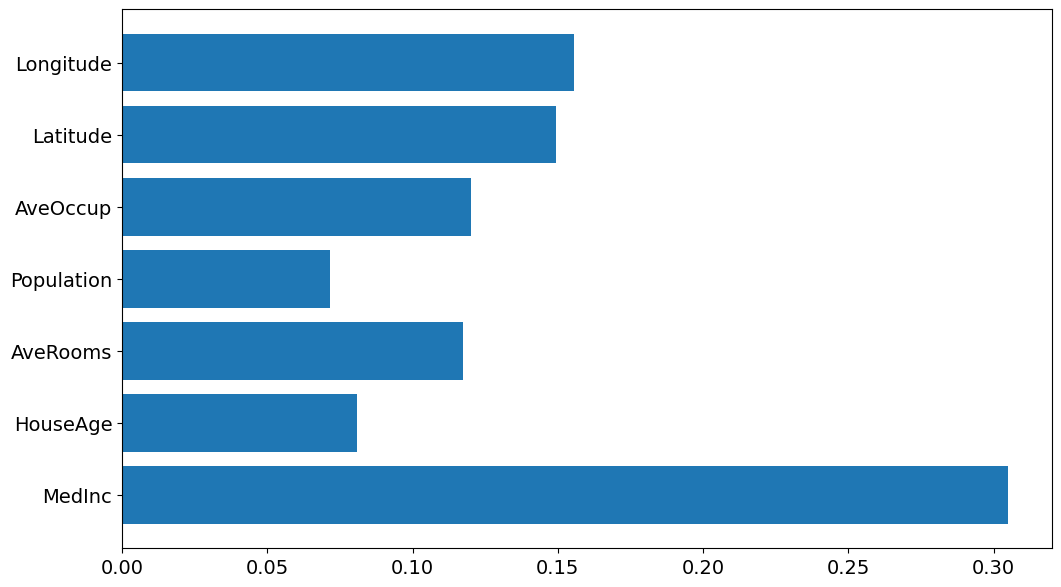

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X, y_label)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.show()

Согласно графику, самым значимым признаком является MedInc, затем координаты.

Теперь построим наше дерево.

In [ ]:
from sklearn.tree import DecisionTreeRegressor


tree = DecisionTreeRegressor(random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Text(0.5, 1.0, 'Descision Tree')

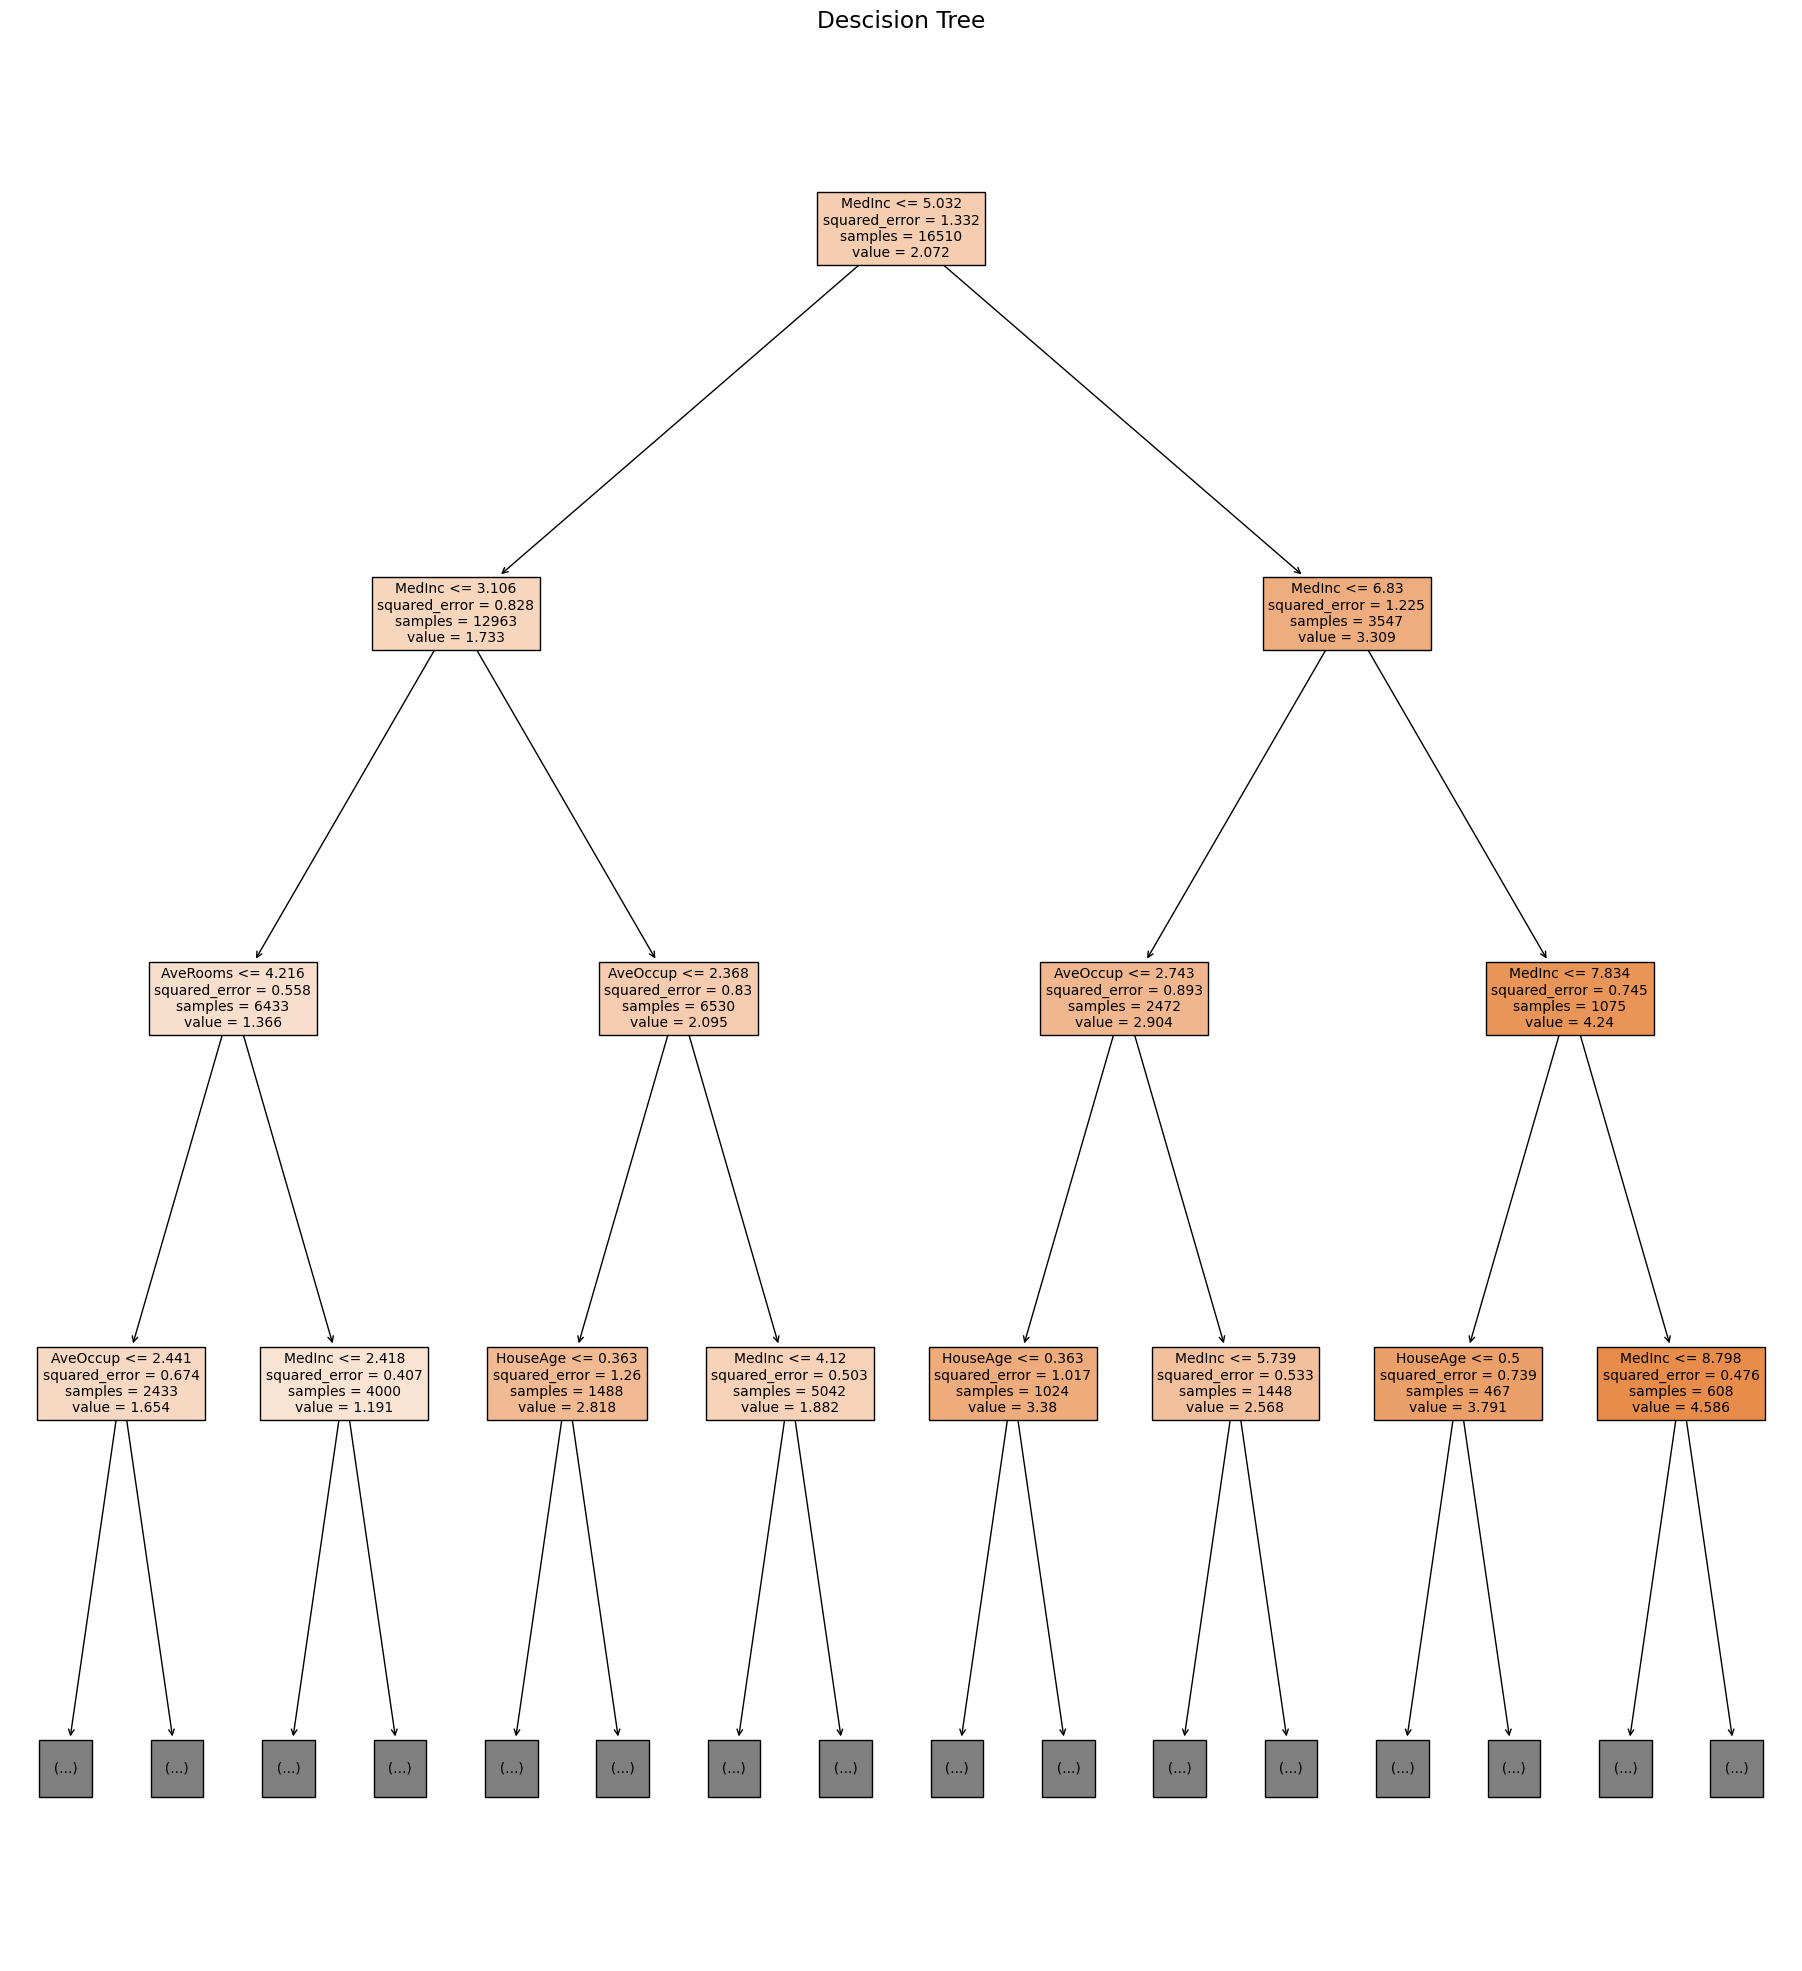

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(23, 25))
plot_tree(tree, max_depth = 3, feature_names= X.columns, filled=True, fontsize = 10)
plt.title('Descision Tree')

In [ ]:
score_DT = tree.score(X_test, y_test)
score_DT

0.6132473518671606

**7. Оптимизируйте глубину дерева (max_depth). \
*Оптимизируйте ещё один параметр модели на выбор.\
a. Повторите п. 5 для полученной модели.**

Оптимизмруем параметр max_depth

In [ ]:
m_depth = np.arange(2, 15)  # случайным образом назначим несколько значений для параметра max_depth
scores = {} #создадим словарь для оценок в зависимости от параметра max_depth

for i in m_depth:
    tree = DecisionTreeRegressor(max_depth = i, random_state = 42).fit(X_train, y_train)
    scores[i] = round(tree.score(X_test, y_test), 4)

opt_depth = {i for i in scores if scores[i]== max(scores.values())}

print(f'Оптимальное значение параметра max_depth:{opt_depth}')

Оптимальное значение параметра max_depth:{11}


Оптимизмруем параметр min_samples_leaf

In [ ]:
msl = np.arange(10, 100)  # случайным образом назначим несколько значений для параметра min_samples_leaf
scores = {} #создадим словарь для оценок в зависимости от параметра min_samples_leaf

for i in msl:
    tree = DecisionTreeRegressor(max_depth = 11, min_samples_leaf = i, random_state = 42).fit(X_train, y_train)
    scores[i] = round(tree.score(X_test, y_test), 4)

opt_msl = {i for i in scores if scores[i]== max(scores.values())}

print(f'Оптимальное значение параметра min_samples_leaf:{opt_msl}')

Оптимальное значение параметра min_samples_leaf:{17}


In [ ]:
tree_2 = DecisionTreeRegressor(max_depth = 11, min_samples_leaf = 17, random_state = 42)
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, min_samples_leaf=17, random_state=42)

In [ ]:
score_ODT = tree_2.score(X_test, y_test)
score_ODT

0.727715478233085

**8. Сформулируйте выводы по проделанной работе. \
a. Сравните точность двух моделей. \
b. Напишите свое мнение, для каких задач предпочтительнее использовать  обученные в работе модели? Какие у них есть плюсы и минусы?**

In [ ]:
data = {'model': ['Linear Regression','Decision Tree Regressor', 'Optimized Decision Tree Regressor'], 
        'scores': [score_LR, score_DT, score_ODT]} 
 
df_compare_models = pd.DataFrame(data)

df_compare_models

,model,scores
0,Linear Regression,0.649402
1,Decision Tree Regressor,0.613247
2,Optimized Decision Tree Regressor,0.727715


а. При одинаковой работе с признаками, модель дерева решений показала более высокий результат, если оптимизировать параметры.

**Плюсы:**
- Деревья решений легко интерпретируются, потому что использую понятные правила разделения по признаку
- поддерживают как категориальные, так и количественные признаки
- довольно быстро обучаются и прогнозируют
- в отличие от линейных моделей позволяют восстанавливать нелинейные зависимости произвольной сложности
- могут работать с пропущенными значениями. \

**Минусы:**
- используют алгоритм жадного поиска признака с максимальным приростом информации
- чувтсвительны к изменениям в обучающей выборке и выбросам
- часто переобучаются
- в случае, где для разделения классов достаточно линии, например, дерево решений будет строить сложную границу, и плохо экстраполироваться.

**Задачи:**\
Диагностика заболеваний, оценка кредитоспособности, например.
